# Computer Science 2XC3 - Graded Lab II

Please refer to the pdf for detailed instructions. The below file contains all the preliminary code you will need to work on the lab. You can copy paste instructions here to create one cohesive lab and organize it that best suits your teams workflow. 

In [1]:
import random
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math
import copy

In [2]:
class GraphI:

    # using hash map
    def __init__(self, edges):
        self.graph = {}
        for x,y in edges:
            if x not in self.graph.keys():
                self.graph[x]=[]
            self.graph[x].append(y)

    def has_edge(self, src, dst):
        return src in self.graph[dst]

    def get_graph_size(self,):
        return len(self.graph)
    
    def get_graph(self,):
        return self.graph

In [3]:
class GraphII:

    # using adjacency list
    def __init__(self, nodes):
        self.graph = []
        # node numbered 0-1
        for node in range(nodes):
            self.graph.append([])
        
    def has_edge(self, src, dst):
        return src in self.graph[dst]
    
    def add_edge(self,src,dst):
        if not self.has_edge(src,dst):
            self.graph[src].append(dst)
            self.graph[dst].append(src)
    
    def get_graph(self,):
        return self.graph

In [4]:
def depth_first_search(G,node,end_point=None):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    while len(stack) !=0:
        node = stack.pop()
        # search for neighbours in graph
        if node not in seen:
            seen.add(node)
            print("Visited node:" + str(node))
            # if the given node has an edge
            if node in graph.keys():
                # iterate over edges of node
                for nn in graph[node]:

                    # limited traversal
                    if nn == end_point:
                        return True
                    # add to stack
                    stack.append(nn)

In [5]:
#Breadth First Search
def breadth_first_search(G, node):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    seen.add(node)

    while len(stack) > 0:
        node = stack[0]
        stack = stack[1:]
        print("Visiting node: " + str(node))
        if node in graph.keys():
            for nn in graph[node]:
                #if node == node2:
                #    return True
                if nn not in seen:
                    stack.append(nn)
                    seen.add(nn)

In [6]:
#Use the methods below to determine minimum vertex covers

def add_to_each(sets, element):
    copy = sets.copy()
    for set in copy:
        set.append(element)
    return copy

def power_set(set):
    if set == []:
        return [[]]
    return power_set(set[1:]) + add_to_each(power_set(set[1:]), set[0])

def is_vertex_cover(G, C):
    for start in G.graph:
        for end in G.graph[start]:
            if not(start in C or end in C):
                return False
    return True

def MVC(G):
    nodes = list(G.get_graph().keys())
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(G, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover


In [7]:

class GraphI:
    def __init__(self, edges):
        self.graph = {}
        for x, y in edges:
            if x not in self.graph.keys():
                self.graph[x] = []
            if y not in self.graph.keys():
                self.graph[y] = []
            self.graph[x].append(y)
            self.graph[y].append(x)  # Assuming undirected graph

    def has_edge(self, src, dst):
        return dst in self.graph.get(src, []) or src in self.graph.get(dst, [])

    def get_graph_size(self):
        return len(self.graph)

    def get_graph(self):
        return self.graph

    def get_highest_degree_vertex(self):
        highest_degree = 0
        highest_degree_vertex = None
        for vertex, edges in self.graph.items():
            if len(edges) > highest_degree:
                highest_degree = len(edges)
                highest_degree_vertex = vertex
        return highest_degree_vertex

    def remove_edges_incident_to(self, vertex):
        if vertex in self.graph:
            for neighbor in self.graph[vertex].copy():
                self.graph[neighbor].remove(vertex)
                if len(self.graph[neighbor]) == 0:
                    del self.graph[neighbor]
            del self.graph[vertex]

    def select_random_edge(self):
        if not self.graph:
            return None
        u = random.choice(list(self.graph.keys()))
        if not self.graph[u]:
            return None
        v = random.choice(self.graph[u])
        return (u, v)

    def is_vertex_cover(self, C):
        for start in self.graph.keys():
            for end in self.graph[start]:
                if not(start in C or end in C):
                    return False
        return True




In [8]:
def Approx1(G):
    C = set()  # Initialize the empty set C
    
    while True:
        v = G.get_highest_degree_vertex()  # Find the vertex with the highest degree
        if v is None:  # If there are no vertices left, break the loop
            break
        C.add(v)  # Add v to C
        G.remove_edges_incident_to(v)  # Remove all edges incident to v
        
        if G.is_vertex_cover(C):  # Check if C is a Vertex Cover
            return C  # If it is, return C
    
    # Fallback, should not reach here if the algorithm works correctly
    return C


def Approx2(G):
    C = set()  # Initialize the empty set C
    
    while True:
        remaining_vertices = [v for v in G.get_graph().keys() if v not in C]
        if not remaining_vertices:  # If there are no remaining vertices, break the loop
            break

        v = random.choice(remaining_vertices)  # Select a vertex randomly that is not in C
        C.add(v)  # Add v to C
        
        if G.is_vertex_cover(C):  # Check if C is a Vertex Cover
            return C  # If it is, return C

    # In case all vertices are added but still not a vertex cover, though unlikely for correct graphs
    return C

def Approx3(G):
    C = set()

    while True:
        edge = G.select_random_edge()
        if not edge:  # If there are no edges left
            break
        u, v = edge
        C.add(u)
        C.add(v)
        G.remove_edges_incident_to(u)
        G.remove_edges_incident_to(v)

        if G.is_vertex_cover(C):
            return C

    return C




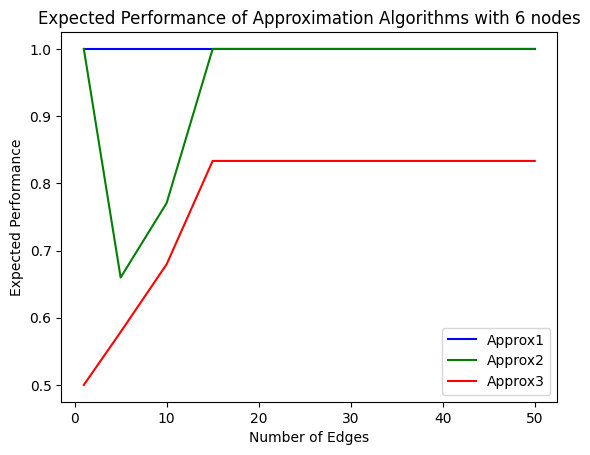

In [9]:

from itertools import combinations

def generate_random_graph(n, e):
    """Generate a random graph with n nodes and e edges."""
    edges = list(combinations(range(n), 2))  # Generate all possible edges
    random.shuffle(edges)  # Shuffle the list of edges
    selected_edges = edges[:e]  # Select the first e edges
    return GraphI(selected_edges)

def calculate_mvc_size(graph):
    """Calculate the size of the minimum vertex cover using the brute-force method."""
    return len(MVC(graph))

def calculate_approximation_size(graph, approximation_algorithm):
    """Calculate the size of the vertex cover using the given approximation algorithm."""
    return len(approximation_algorithm(graph))

def evaluate_approximations(n, edge_counts):
    results = {e: {'mvc_sum': 0, 'approx1_sum': 0, 'approx2_sum': 0, 'approx3_sum': 0} for e in edge_counts}
    mvc_baseline_sum = 0 #Baseline sum of MVC sizes
    
    simIter = 2000
    for e in edge_counts:
        for _ in range(simIter):  # Generate and evaluate simIter random graphs
            graph = generate_random_graph(n, e)
            original_graph_copy = copy.deepcopy(graph)  # Make a copy for reuse
            
            # Calculate MVC size
            mvc_size = calculate_mvc_size(original_graph_copy)
            results[e]['mvc_sum'] += mvc_size
            mvc_baseline_sum += mvc_size # Accumulate MVC sizes for baseline
            
            # Reset graph to original state for each approximation
            graph_copy = copy.deepcopy(graph)
            results[e]['approx1_sum'] += calculate_approximation_size(graph_copy, Approx1)
            
            graph_copy = copy.deepcopy(graph)
            results[e]['approx2_sum'] += calculate_approximation_size(graph_copy, Approx2)
            
            graph_copy = copy.deepcopy(graph)
            results[e]['approx3_sum'] += calculate_approximation_size(graph_copy, Approx3)
    
    # Calculate and display expected performance
    edge_counts = sorted(edge_counts)
    approx1_performance = []
    approx2_performance = []
    approx3_performance = []

    for e, data in results.items():

        # Calculate the proportion of MVC size sum over baseline for each approximation
        approx1_performance.append(data['mvc_sum'] / data['approx1_sum'])
        approx2_performance.append(data['mvc_sum'] / data['approx2_sum'])
        approx3_performance.append(data['mvc_sum'] / data['approx3_sum'])

        # print(f"Edges: {e}")
        # print(f"MVC Average Size: {data['mvc_sum'] / simIter:.2f}")
        # print(f"Approx1 Average Size: {data['approx1_sum'] / simIter:.2f}, Ratio: {data['approx1_sum'] / data['mvc_sum']:.2f}")
        # print(f"Approx2 Average Size: {data['approx2_sum'] / simIter:.2f}, Ratio: {data['approx2_sum'] / data['mvc_sum']:.2f}")
        # print(f"Approx3 Average Size: {data['approx3_sum'] / simIter:.2f}, Ratio: {data['approx3_sum'] / data['mvc_sum']:.2f}")
        # print()

    plt.plot(edge_counts, approx1_performance, 'b-', label='Approx1')
    plt.plot(edge_counts, approx2_performance, 'g-', label='Approx2')
    plt.plot(edge_counts, approx3_performance, 'r-', label='Approx3')

    # Graph settings
    plt.xlabel('Number of Edges')
    plt.ylabel('Expected Performance')
    plt.title(f'Expected Performance of Approximation Algorithms with {n} nodes')
    plt.legend()
    plt.show()
    
# Example usage
edge_counts = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
evaluate_approximations(6, edge_counts)


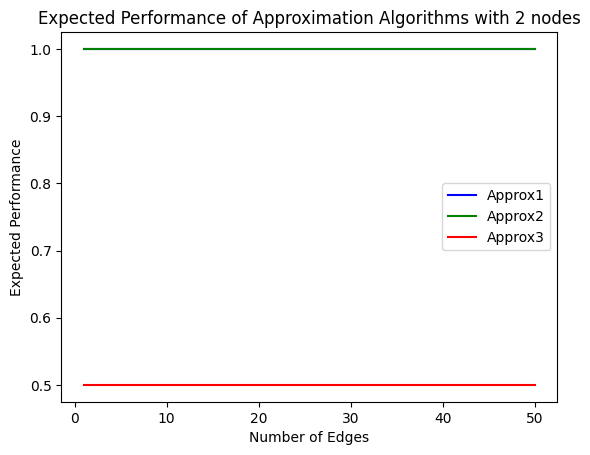

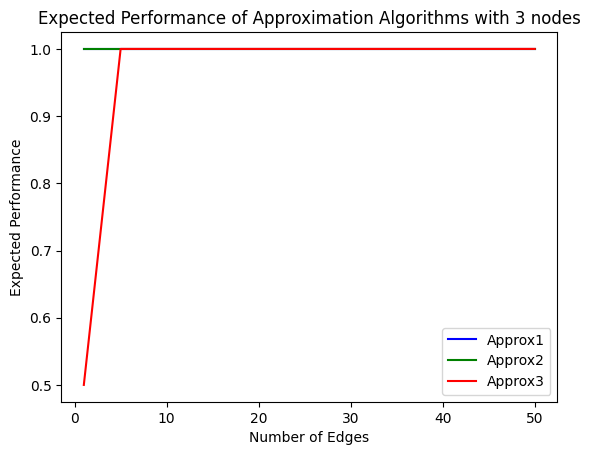

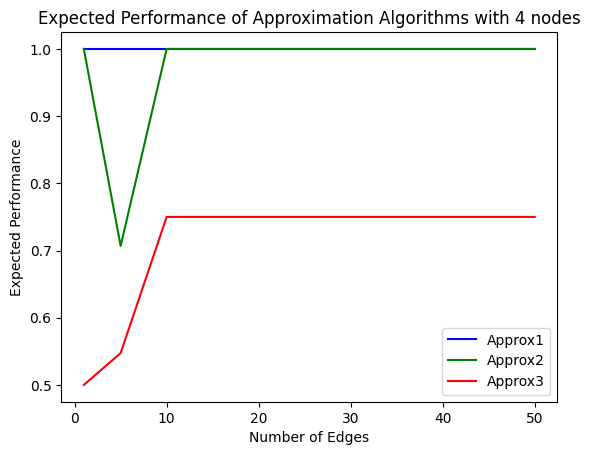

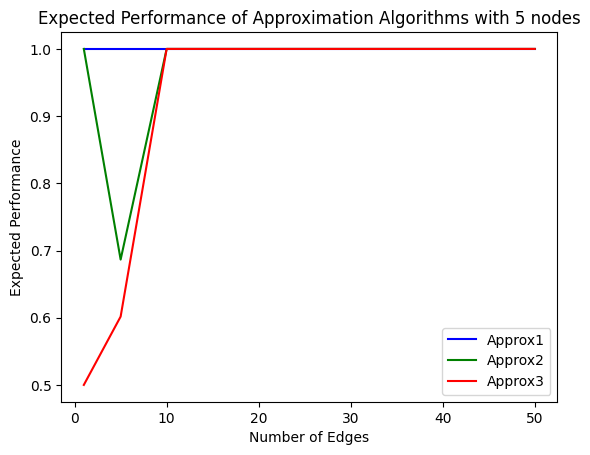

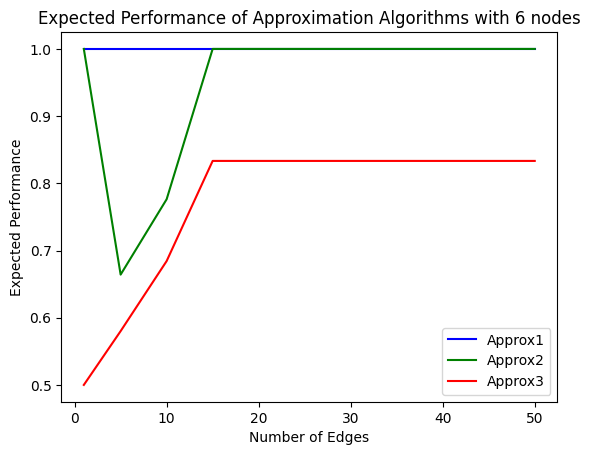

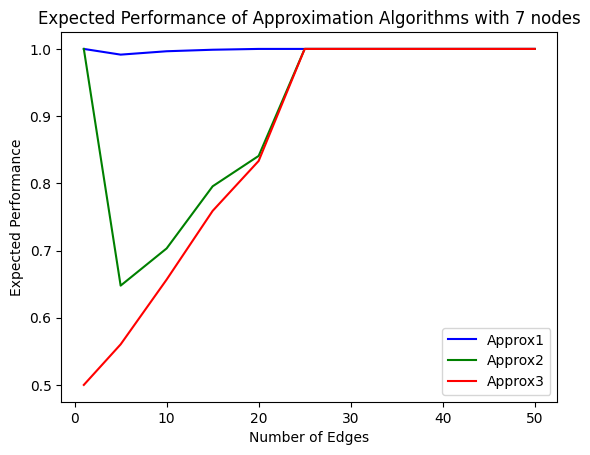

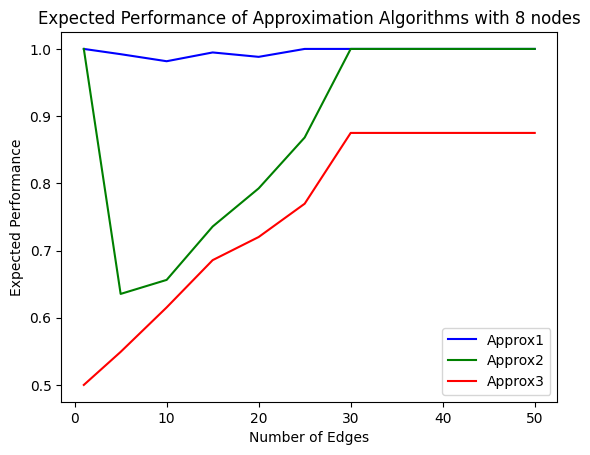

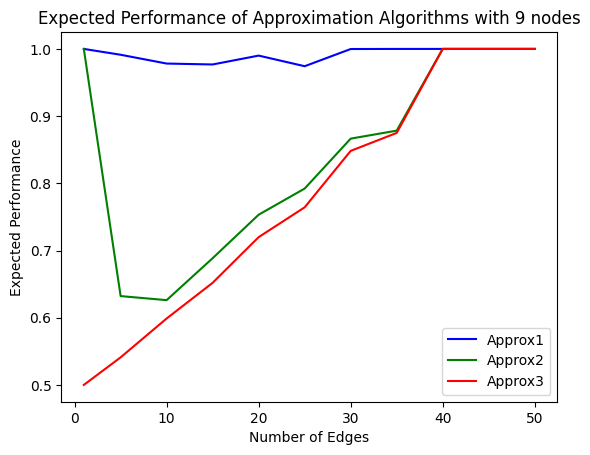

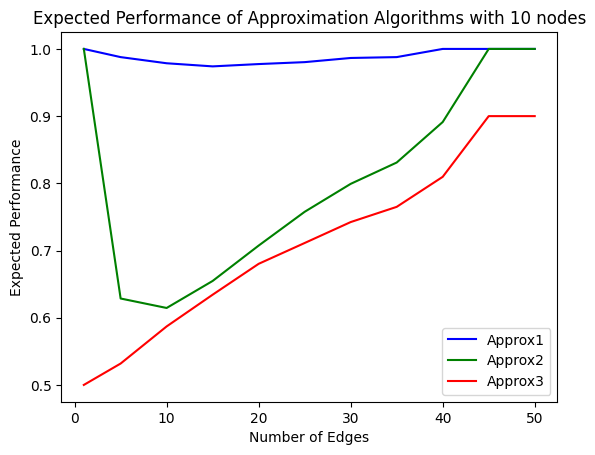

In [10]:
for numNodes in range(2,11):
    evaluate_approximations(numNodes,edge_counts)

In [11]:
def generate_all_graphs(n):
    vertices = list(range(n))
    all_edges = list(combinations(vertices, 2))
    num_edges = len(all_edges)

    for i in range(2**num_edges):
        edges = [all_edges[j] for j in range(num_edges) if (i >> j) & 1]
        yield GraphI(edges)

In [12]:
def compare_mvc_approx1(n):
    worst_ratio = 1
    for graph in generate_all_graphs(n):
        original_edges = [(v, w) for v, neighbors in graph.graph.items() for w in neighbors if v < w]
        mvc = MVC(GraphI(original_edges))  # Use MVC function here
        approx_cover = Approx1(GraphI(original_edges))  # Recreate graph for Approx1
        ratio = len(approx_cover) / (len(mvc) if mvc else 1)
        worst_ratio = max(worst_ratio, ratio)
    return worst_ratio


n = 5
worst_ratio = compare_mvc_approx1(n)
print(f"Worst-case ratio of Approx1 to MVC for graphs of size {n}: {1/worst_ratio}")

Worst-case ratio of Approx1 to MVC for graphs of size 5: 0.6666666666666666
